In [1]:
#!pip install gym

In [2]:
import gym
import numpy as np

https://gym.openai.com/

In [3]:
# Инициализация среды
env = gym.make("Taxi-v2")
state = env.reset()
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
state

369

In [5]:
env.action_space, env.observation_space

(Discrete(6), Discrete(500))

In [6]:
# Пример шага
env.step(2)
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


In [7]:
state, reward, done, info = env.step(env.action_space.sample())
state, reward, done, info

(389, -10, False, {'prob': 1.0})

In [8]:
# Случайные действия
state = env.reset()
total_reward, counter = 0, 0
reward = None
while reward != 20:
    state, reward, done, info = env.step(env.action_space.sample())
    counter += 1
    total_reward += reward
print(counter)
print(total_reward)

2358
-9213


In [9]:
# Опишем агента с табличным Q-обучением
Q = np.zeros([env.observation_space.n, env.action_space.n])
gamma = 1
epsilon = 1
epsilon_decay = 0.99
alpha = 0.5
rewards_log, counters_log = [], []

for episode in range(1,2001):
    done = False
    total_reward, counter = 0, 0
    state = env.reset()
    while done != True:
        # выбираем действие эпсилон-жадно
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
            
        # делаем шаг
        state2, reward, done, info = env.step(action)
        
        # дообучаем Q-значение
        if done:
            Q[state,action] += alpha * (reward - Q[state,action])
        else:
            Q[state,action] += alpha * (reward + gamma * np.max(Q[state2]) - Q[state,action])
            
        total_reward += reward
        counter += 1
        state = state2
        
    if episode % 100 == 0 or episode == 1:
        print('Episode {:4d} Total Reward: {:4d} counter: {}'.format(episode,total_reward,counter))
    rewards_log.append(total_reward)
    counters_log.append(counter)
    epsilon *= epsilon_decay

Episode    1 Total Reward: -812 counter: 200
Episode  100 Total Reward: -127 counter: 76
Episode  200 Total Reward:   10 counter: 11
Episode  300 Total Reward:  -49 counter: 52
Episode  400 Total Reward:   13 counter: 8
Episode  500 Total Reward:    6 counter: 15
Episode  600 Total Reward:   11 counter: 10
Episode  700 Total Reward:    8 counter: 13
Episode  800 Total Reward:   10 counter: 11
Episode  900 Total Reward:   12 counter: 9
Episode 1000 Total Reward:    7 counter: 14
Episode 1100 Total Reward:   13 counter: 8
Episode 1200 Total Reward:   12 counter: 9
Episode 1300 Total Reward:    7 counter: 14
Episode 1400 Total Reward:    8 counter: 13
Episode 1500 Total Reward:   10 counter: 11
Episode 1600 Total Reward:    7 counter: 14
Episode 1700 Total Reward:    9 counter: 12
Episode 1800 Total Reward:    9 counter: 12
Episode 1900 Total Reward:    9 counter: 12
Episode 2000 Total Reward:    9 counter: 12


In [10]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

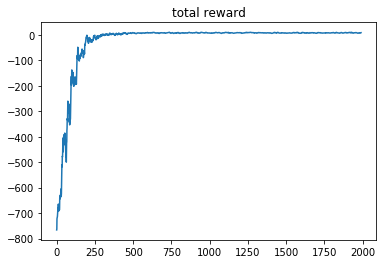

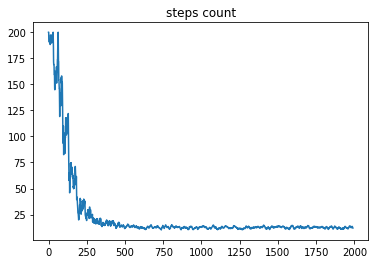

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(moving_average(rewards_log))
plt.title('total reward')
plt.show()
plt.plot(moving_average(counters_log))
plt.title('steps count')
plt.show()

In [12]:
sum(rewards_log[-100:])/100, sum(counters_log[-100:])/100

(8.56, 12.44)

In [13]:
from time import sleep
from IPython.display import clear_output

In [14]:
# Визуализация стратегии агента
state = env.reset()
done = False

env.render()
sleep(0.5)
print(flush=True)

while done != True:
    action = np.argmax(Q[state])
    state2, reward, done, info = env.step(action)
    clear_output()
    env.render()
    print(flush=True)
    sleep(0.5)
    state = state2   

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)



In [15]:
env = gym.make('Blackjack-v0')

In [16]:
env.observation_space, env.action_space

(Tuple(Discrete(32), Discrete(11), Discrete(2)), Discrete(2))

In [17]:
n_obs = [space.n for space in env.observation_space.spaces]
n_obs

[32, 11, 2]

In [18]:
env.reset()

(17, 6, False)

In [19]:
env.step(0)

((17, 6, False), 1.0, True, {})

In [20]:
# Опишем агента с табличным Q-обучением
Q = np.zeros(n_obs + [env.action_space.n]) 
total_reward = 0
gamma = 1
epsilon = 3
epsilon_decay = 0.9997
alpha = 0.4
rewards_log = []
counters_log = []
for episode in range(1,50001):
    done = False
    total_reward, counter = 0,0
    state = env.reset()
    while done != True:
        state_tup = tuple([int(i) for i in state])
        
        # выбираем действие эпсилон-жадно
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:            
            action = np.argmax(Q[state_tup])
        
        # делаем шаг
        state2, reward, done, info = env.step(action)
        state2_tup = tuple([int(i) for i in state2])
        
        # дообучаем Q-значение
        if done:
            Q[state_tup][action] += alpha * (reward - Q[state_tup][action])
        else:
            Q[state_tup][action] += alpha * (reward + gamma * np.max(Q[state2_tup]) - Q[state_tup][action])
            
        total_reward += reward
        counter += 1
        state = state2   
        
    if episode % 1000 == 0 or episode == 1:
        print('Episode {:5d} Total Reward: {:2d} counter: {}'.format(episode,int(total_reward),counter))
    rewards_log.append(total_reward)
    counters_log.append(counter)
    epsilon *= epsilon_decay

Episode     1 Total Reward: -1 counter: 1
Episode  1000 Total Reward: -1 counter: 1
Episode  2000 Total Reward:  0 counter: 3
Episode  3000 Total Reward: -1 counter: 1
Episode  4000 Total Reward: -1 counter: 1
Episode  5000 Total Reward:  1 counter: 1
Episode  6000 Total Reward: -1 counter: 1
Episode  7000 Total Reward: -1 counter: 2
Episode  8000 Total Reward:  1 counter: 4
Episode  9000 Total Reward: -1 counter: 1
Episode 10000 Total Reward:  1 counter: 2
Episode 11000 Total Reward:  0 counter: 3
Episode 12000 Total Reward: -1 counter: 1
Episode 13000 Total Reward:  1 counter: 1
Episode 14000 Total Reward: -1 counter: 1
Episode 15000 Total Reward:  1 counter: 2
Episode 16000 Total Reward: -1 counter: 1
Episode 17000 Total Reward:  0 counter: 1
Episode 18000 Total Reward:  1 counter: 1
Episode 19000 Total Reward: -1 counter: 1
Episode 20000 Total Reward:  1 counter: 2
Episode 21000 Total Reward:  1 counter: 1
Episode 22000 Total Reward:  1 counter: 1
Episode 23000 Total Reward: -1 cou

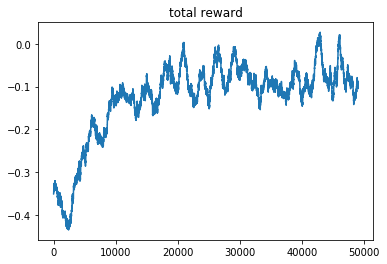

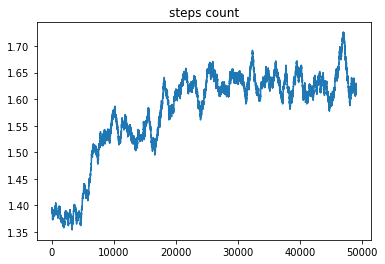

In [21]:
plt.plot(moving_average(rewards_log, 1000))
plt.title('total reward')
plt.show()
plt.plot(moving_average(counters_log, 1000))
plt.title('steps count')
plt.show()